In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import cmath
#import scipy.integrate.odeint

In [2]:
#N = int(input("enter the no. of nodes : "))
N =100

Graph Created

In [3]:
G = nx.scale_free_graph(N) #scale free directed network is created
G = G.to_undirected() # changed to undirected graph
G.pos = nx.spring_layout(G) #to give nodes spring like structure
    #nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

#normal distribution
omega = np.random.normal(loc=1, scale=2, size=(N))

it=0    
for node in G.nodes():
    G.nodes[node]['w'] = omega[it]
    G.nodes[node]['theta'] = np.random.rand()
    G.nodes[node]['thetadot'] = 0
    it+=1

nextG = G.copy() #copy graph

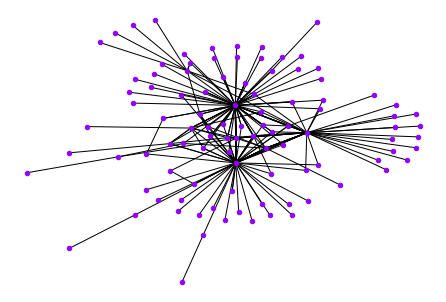

In [4]:
nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

Adjacency Matrix

In [5]:
#extracting adjacency matrix
p = nx.adjacency_matrix(G).toarray()  
#print(p)
#changing weighted matrix to unweighted
A = (p>=1).astype(int)
print(A)

[[1 1 1 ... 1 0 1]
 [1 1 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
def f(t0,theta, node,t):
    dt = t
    time = 1 
    cpl = 0
    lmd = 3

    # sigma terms
    for j in range(N):
        cpl += A[node][j]*np.sin(theta[j]-theta[node])
    
    
    thetadot = nextG.nodes[node]['w'] + (lmd*abs(nextG.nodes[node]['w'])*cpl)/(sum(A[node]))
        
        
#    nextG.nodes[node]['theta'] += nextG.nodes[node]['thetadot']*dt
        
    return thetadot

In [ ]:
def f2(t0,theta, node,t):
    dt = t
    time = 1 
    cpl = 0
    lmd = 0.5


    thetadot = nextG.nodes[node]['w'] + (lmd*abs(nextG.nodes[node]['w'])*cpl[node])/(sum(A[node]))
        
        
#    nextG.nodes[node]['theta'] += nextG.nodes[node]['thetadot']*dt
        
    return thetadot




In [ ]:
def cpl():
    mat = np.zeros(N)
    for node in G.nodes():
        for j in range(N):
            mat[node] += A[node][j]*np.sin(G.nodes[j]['theta']-G.nodes[node]['theta'])
    return mat
mat = cpl()
print(mat)

RK-4 algorithm

In [ ]:
# RK-4 method
def rk4(t0,y0,xn,n):
    
    # Calculating step size
    h = (xn-t0)/n

    time_series = []
    print(n,N)
    for i in tqdm(range(n)):
#        cpl = cpl()
        data = np.zeros(N)
        for node in G.nodes():
            k1 = h * (f(t0, y0, node, h))
            k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
            k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
            k4 = h * (f((t0+h), (y0+k3),node, h))
            k = (k1+2*k2+2*k3+k4)/6
            yn = y0[node] + k
#            print('%.4f\t%.4f\t%.4f'% (t0,y0[node],yn) )
#            print('-------------------------')
            y0[node] = yn
            t0 = t0+h
            data[node] = yn
#        G.nodes[:][nodes] = data
        time_series.append(data) 
    return time_series

# Inputs
t0 = 0
y0 = np.zeros(N)
for i in range(N):
    y0[i] = G.nodes[i]['theta']
xn = 100
step = 1000

data = rk4(t0,y0,xn,step)
data = np.array(data)
print(np.shape(data))

In [ ]:
print(data)

In [ ]:
# RK-4 method
def rk4(t0,y0,xn,n):
    
    # Calculating step size
    h = (xn-t0)/n

    time_series = np.zeros(n)
    for i in range(n):
        cpl = cpl()
        data = np.zeros(N)
        for node in G.nodes():
            k1 = h * (f(t0, y0[node], node, h))
            k2 = h * (f((t0+h/2), (y0[node]+k1/2),node, h))
            k3 = h * (f((t0+h/2), (y0[node]+k2/2),node, h))
            k4 = h * (f((t0+h), (y0[node]+k3),node, h))
            k = (k1+2*k2+2*k3+k4)/6
            yn = y0[node] + k
            print('%.4f\t%.4f\t%.4f'% (t0,y0[node],yn) )
            print('-------------------------')
            y0[node] = yn
            t0 = t0+h
            data[node] = yn
        G.nodes[:][nodes] = data
        time_series[i]=data
    return time_series

# Inputs
t0 = 0
y0 = G.nodes[:]['theta']
xn = 100
step = 100

data = rk4(t0,y0,xn,step)

In [ ]:

def order(theta):
    z = sum(np.exp(theta*1j))/len(theta)
    return np.array([np.absolute(z), np.angle(z)])

In [ ]:
ordr = []

for i in range(step):
    the_ta = data[i]
    ordr.append(order(the_ta))
    i+=25
ordr = np.array(ordr)
print(np.shape(ordr))
#abs_ord = np.zeros(step)
#print(abs_ord)

ordr = ordr.flatten()
#for i in range(len(ordr)):
#    abs_ord = ordr[i][0]
abs_ord = ordr[0:1000]
angle = ordr[1000:2000]
#print(ordr.ndim)
#print(ordr)
plt.plot(abs_ord)